## 루브릭

1. 인물모드 사진을 성공적으로 제작하였다.	
- 아웃포커싱 효과가 적용된 인물모드 사진과 동물 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다.
2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다.	
- 인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다.
3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다.	
- semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 이유와 함께 제시하였다.

In [1]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from importlib.metadata import version


## Step1. 인물모드 직접해보기
- 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
- 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
- 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배
경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

In [2]:
'''사진 읽어오기'''
# 마동석 사진 
img_path_m = os.getenv('HOME')+'/aiffel/workplace/AiffelEX/image_set/madong2.jpg'  
img_orig_m = cv2.imread(img_path_m)
# 시바견 사진
img_path_d = os.getenv('HOME')+'/aiffel/workplace/AiffelEX/image_set/dog.jpg'  
img_orig_d = cv2.imread(img_path_d)
# 홍콩거리사진
img_path_w = os.getenv('HOME')+'/aiffel/workplace/AiffelEX/image_set/hongkong.jpg'  
img_orig_w = cv2.imread(img_path_w)


In [3]:
# 이미지 리스트 구성
img_path = [img_path_m, img_path_d, img_path_w]
img_orig = [img_orig_m, img_orig_d, img_orig_w]
img_name = ["마동석", "웰시코기", "홍콩"]

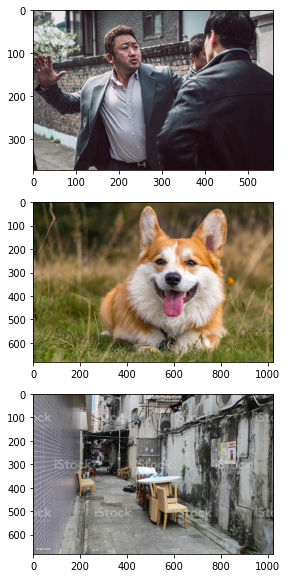

In [5]:
# 이미지 출력
plt.figure(figsize=(10,10))

plt.subplot(311)
plt.imshow(cv2.cvtColor(img_orig_m, cv2.COLOR_BGR2RGB))

plt.subplot(312)
plt.imshow(cv2.cvtColor(img_orig_d, cv2.COLOR_BGR2RGB))

plt.subplot(313)
plt.imshow(cv2.cvtColor(img_orig_w, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# 다운받아 놓은 모델로 세그멘테이션 모델 생성
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model = semantic_segmentation() 
#PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) 
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [7]:
segvalues_list = []
output_list = []
for img in img_path :
    segvalues, output = model.segmentAsPascalvoc(img)
    segvalues_list.append(segvalues)
    output_list.append(output)
'''segmentAsPascalvoc()함수 를 호출 하여 
입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 
분할은 pacalvoc 데이터로 학습된 모델을 이용'''

'segmentAsPascalvoc()함수 를 호출 하여 \n입력된 이미지를 분할, 분할 출력의 배열을 가져옴, \n분할은 pacalvoc 데이터로 학습된 모델을 이용'

In [8]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

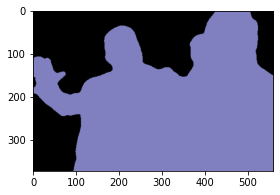

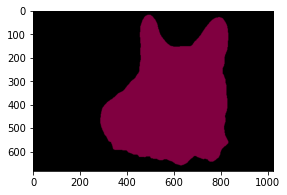

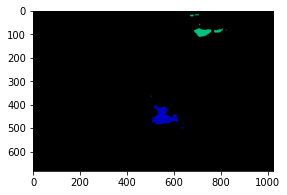

In [9]:
# 각 사진에 대한 세그멘테이션 결과

for i in range(len(output_list)) :
    plt.figure(figsize=(10,10))
    plt.subplot(len(output_list),1,i+1)
    plt.imshow(output_list[i])
plt.show()

In [10]:
# segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
# img_name = ["마동석", "웰시코기", "홍콩"]

for i in range(len(segvalues_list)) :
    print(img_name[i])
    for class_id in segvalues_list[i]['class_ids']:
        print(LABEL_NAMES[class_id])
    print("==================")

마동석
background
person
웰시코기
background
dog
홍콩
background
chair
diningtable
train


- 1번 사진(마동석) : 인물로 분류가 잘 되었다
- 2번 사진(시바견) : 강아지로 분류가 잘 되었다

In [11]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

In [12]:
print(colormap[12]) # dog
print(colormap[15]) # person

[ 64   0 128]
[192 128 128]


In [13]:
seg_color_d = (128,0,64) #dog
seg_color_p = (128,128,192)  # person

(373, 560)


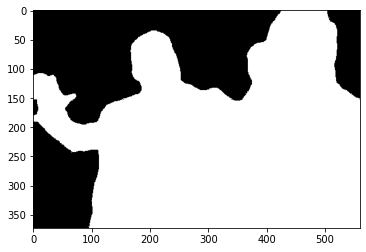

In [14]:
seg_map_p = np.all(output_list[0]==seg_color_p, axis=-1) 
print(seg_map_p.shape) 
plt.imshow(seg_map_p, cmap='gray')
plt.show()

(682, 1024)


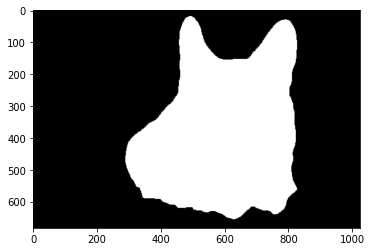

In [15]:
seg_map_d = np.all(output_list[1]==seg_color_d, axis=-1) # 
print(seg_map_d.shape) 
plt.imshow(seg_map_d, cmap='gray')
plt.show()

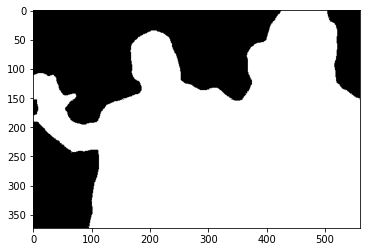

In [16]:
# 이미지 마스크 제작
img_mask_p = seg_map_p.astype(np.uint8) * 255
img_mask_d = seg_map_d.astype(np.uint8) * 255
img_mask_color_p = cv2.cvtColor(img_mask_p, cv2.COLOR_GRAY2BGR)
img_mask_color_d = cv2.cvtColor(img_mask_d, cv2.COLOR_GRAY2BGR)
plt.imshow(img_mask_color_p)

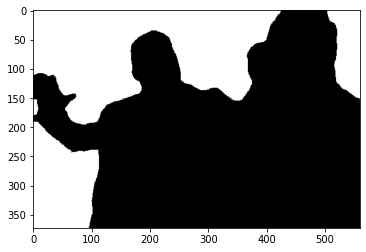

In [17]:
# 검흰 반전
img_bg_mask_p = cv2.bitwise_not(img_mask_color_p)
img_bg_mask_d = cv2.bitwise_not(img_mask_color_d)

plt.imshow(img_bg_mask_p)

In [18]:
# 미리 블러이미지 생성

img_orig_blur = []
for i in range(2) :
    img_orig_blur.append(cv2.blur(img_orig[i], (20,20)))

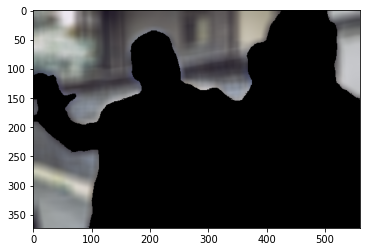

In [19]:
# 각 블러한 사진에서 분류부분 검정색으로 변환
img_bg_blur_p = cv2.bitwise_and(img_orig_blur[0], img_bg_mask_p)
img_bg_blur_d = cv2.bitwise_and(img_orig_blur[1], img_bg_mask_d)
plt.imshow(img_bg_blur_p)

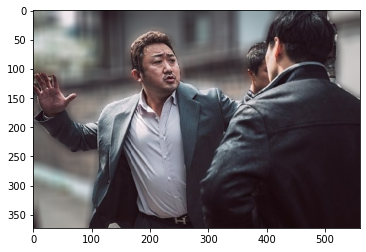

In [20]:
img_concat_m = np.where(img_mask_color_p==255, img_orig_m, img_bg_blur_p)
plt.imshow(cv2.cvtColor(img_concat_m, cv2.COLOR_BGR2RGB))
plt.show()

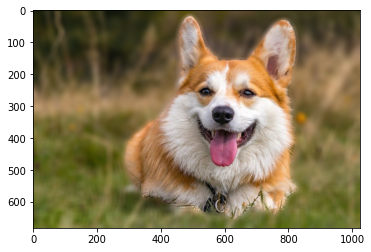

In [21]:
img_concat_d = np.where(img_mask_color_d==255, img_orig_d, img_bg_blur_d)
plt.imshow(cv2.cvtColor(img_concat_d, cv2.COLOR_BGR2RGB))
plt.show()

### 크로마키 합성

In [22]:
print(img_orig_m.shape)  # y, x 순서
print(img_orig_d.shape)
print(img_orig_w.shape)

(373, 560, 3)
(682, 1024, 3)
(682, 1024, 3)


In [23]:
# 크로마키를 위한 리사이징

img_w_m = cv2.resize(img_orig_w, (560, 373))  # w, h 순서
                     
img_w_d = cv2.resize(img_orig_w, (1024, 682))

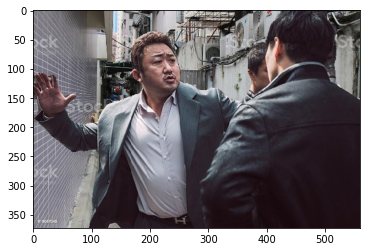

In [24]:
img_concat_m_c = np.where(img_mask_color_p ==255, img_orig_m, img_w_m )
plt.imshow(cv2.cvtColor(img_concat_m_c, cv2.COLOR_BGR2RGB))
plt.show()

# 홍콩 뒷골목 배경으로 전환

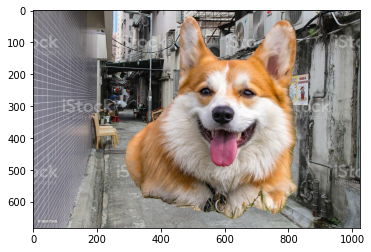

In [25]:
img_concat_d_c = np.where(img_mask_color_d==255, img_orig_d, img_w_d )
plt.imshow(cv2.cvtColor(img_concat_d_c, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2. 사진에서 문제점 찾기

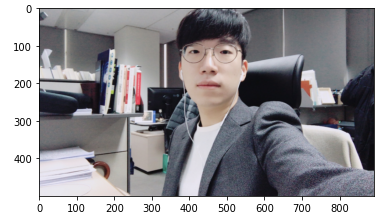
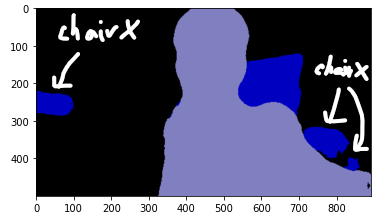
- 의자가 아닌 부분에 의자로 표시되는 문제점이 있다

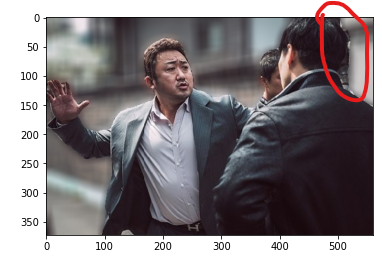
- 오른쪽 위 부분이 필터링 미흡

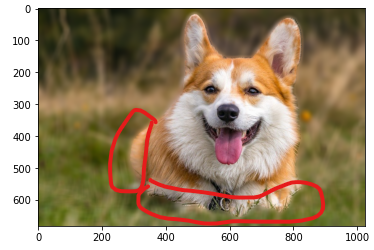
- 털 경계 부분 필터링 미흡

## Step 3. 해결 방법을 제안해 보기

1. 첫번째 사진에서 의자부분이 아닌것이 의자로 인식되는 문제
- 이는 세그멘테이션 모델 자체의 문제로 생각된다
- 모델의 학습부분에서 개선이 필요해보인다
- 또는 수동으로 의자가 아닌부분의 세그멘테이션 해제하는 방법을 사용해볼 수 있겠다

2. 두번쨰 사진에서 목 뒷부분이 제대로 분리되지 않는 문제
- 이는 심도의 문제로 보인다
- 심도의 문제는 사진을 찍을때 3d 이미지 센서로 찍으면 심도 구분이 되어 더 잘 분리가 될 수 있을 것 같다
- 사진이 아니라 영상이라면, 이동에 따라 심도가 변화를 감지하여 상대적인 심도를 얻어내는 구글의 struct2Depth를 사용한다면 심도에 따른 구분을 더 잘해낼 수 있을 것같다

3. 세번째 사진에서 털부분이 잘 분리되지 않는 문제
- 마스크의 경계를 털경계부에 따라 더 세부적으로 설정해야 해결가능하다
- 하지만 이는 경계라인을 고해상도로 출력하는 모델을 만들어도 과도하게 많은 계산이 필요할 것으로 예상된다.
- 현실적으로는 세그멘테이션 경계를 털의 경계를 따라 설정하는 것은 어려워보인다
